In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def score_discrete(score):
    if score <= -0.05:
        return -1
    elif score >= 0.05:
        return 1
    else:
        return 0
    
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']


In [3]:
df_eng_span = pd.read_csv('test_df.csv', encoding='utf8')
df_eng_span

,Unnamed: 0,review_en,review_es,sentiment
0,40548,As a Spanish tourist in Los Angeles and a fana...,Como turista español en Los Ángeles y un amant...,negative
1,25110,Excellent movie about a big media firm and the...,Excelente película sobre una gran firma de med...,positive
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",positive
3,23051,"Of all movies (and I'm a film graduate, if tha...",De todas las películas (y soy un graduado de c...,negative
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,positive
5,11046,Cradle of FearThis isn't a movie where intrica...,La cuna de Fearthis no es una película donde l...,negative
6,36289,"Voor een verloren soldaat , for a lost soldier...","Voor Een Verllen Soldaat, para un soldado perd...",negative
7,12297,"I was looking forward to seeing this movie, un...","Tenía muchas ganas de ver esta película, desaf...",negative
8,29180,"A friend of mine decided to rent this thing, l...","Un amigo mío decidió alquilar esta cosa, suert...",negative
9,10055,This film has a powerful philosophical ending....,Esta película tiene un poderoso final filosófi...,positive


In [4]:
# change positve and negative to 1 and 0

df_eng_span['sentiment'] = df_eng_span['sentiment'].replace({'positive' : 1, 'negative' : -1})
df_eng_span.head()

,Unnamed: 0,review_en,review_es,sentiment
0,40548,As a Spanish tourist in Los Angeles and a fana...,Como turista español en Los Ángeles y un amant...,-1
1,25110,Excellent movie about a big media firm and the...,Excelente película sobre una gran firma de med...,1
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",1
3,23051,"Of all movies (and I'm a film graduate, if tha...",De todas las películas (y soy un graduado de c...,-1
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,1


In [5]:
# take a random sample of size n

df_sample = df_eng_span.sample(n=1000, replace = True)

In [7]:
#applying nltk to english reviews

df_sample['nltk_score_eng'] = df_sample['review_en'].apply(sentiment_analysis)
df_sample['nltk_score_eng_discrete'] = df_sample['nltk_score_eng'].apply(score_discrete)

df_sample.head()

,Unnamed: 0,review_en,review_es,sentiment,nltk_score_eng,nltk_score_eng_discrete
26,34417,See Three Colors: Blue and Three Colors: White...,Ver tres colores: azul y tres colores: blanco....,1,0.9888,1
23,10744,Moonwalker by Michael Jackson is a real advent...,Moonwalker de Michael Jackson es una verdadera...,1,0.9775,1
32,14212,"Arriving by boxcar in New York City, the shrew...","Llegada por Boxcar en la ciudad de Nueva York,...",1,0.9771,1
13,46983,"I lack cable-vision and no longer have ""DirecT...","Falta la visión de cable y ya no tengo ""DirecT...",1,0.9849,1
9,10055,This film has a powerful philosophical ending....,Esta película tiene un poderoso final filosófi...,1,0.9293,1


In [9]:
#applying nltk to spanish reviews
df_sample['nltk_score_es'] = df_sample['review_es'].apply(sentiment_analysis)
df_sample['nltk_score_es_discrete'] = df_sample['nltk_score_es'].apply(score_discrete)

df_sample.head()

,Unnamed: 0,review_en,review_es,sentiment,nltk_score_eng,nltk_score_eng_discrete,nltk_score_es,nltk_score_es_discrete
26,34417,See Three Colors: Blue and Three Colors: White...,Ver tres colores: azul y tres colores: blanco....,1,0.9888,1,-0.7783,-1
23,10744,Moonwalker by Michael Jackson is a real advent...,Moonwalker de Michael Jackson es una verdadera...,1,0.9775,1,-0.4885,-1
32,14212,"Arriving by boxcar in New York City, the shrew...","Llegada por Boxcar en la ciudad de Nueva York,...",1,0.9771,1,-0.7351,-1
13,46983,"I lack cable-vision and no longer have ""DirecT...","Falta la visión de cable y ya no tengo ""DirecT...",1,0.9849,1,-0.9529,-1
9,10055,This film has a powerful philosophical ending....,Esta película tiene un poderoso final filosófi...,1,0.9293,1,-0.5267,-1


In [10]:
# compute accuracy

en_accuracy = df_sample[df_sample["nltk_score_eng_discrete"] == df_sample["sentiment"]].shape[0]/df_sample.shape[0]

es_accuracy = df_sample[df_sample["nltk_score_es_discrete"] == df_sample["sentiment"]].shape[0]/df_sample.shape[0]

In [11]:
en_accuracy

0.675

In [12]:
es_accuracy

0.608

In [13]:
def case_sorter(score, binary_nltk_score):
    if score == 1 and binary_nltk_score == 1:
         return 'true positive'
    elif score == 1 and binary_nltk_score == -1:
         return 'false negative'
    elif score == -1 and binary_nltk_score == 1:
         return 'false positive'
    else:
         return 'true negative'

In [ ]:
# !conda update pandas

<Axes: xlabel='score_compared', ylabel='count'>

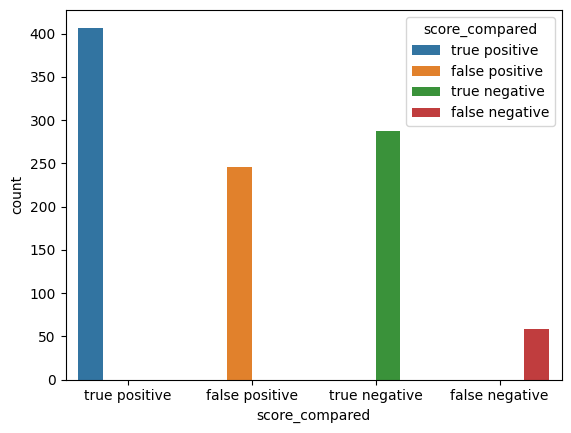

In [16]:
# check english accuracy

score_counts = pd.DataFrame({'score_compared' : pd.Series(df_sample.apply(lambda row: case_sorter(row['sentiment'], row['nltk_score_eng_discrete']), axis=1))})
sns.countplot(data = score_counts, x = 'score_compared', hue = 'score_compared')

In [22]:
# df_sample

<Axes: xlabel='score_compared', ylabel='count'>

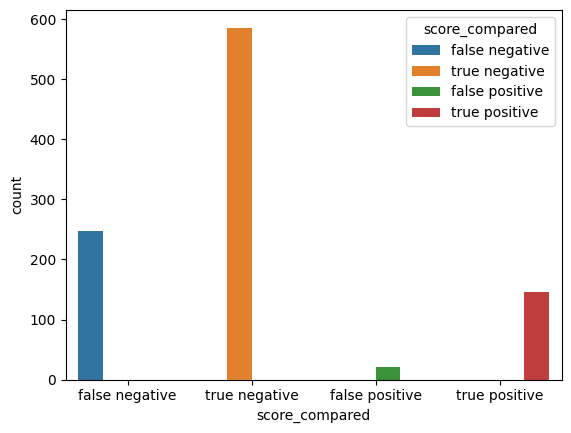

In [21]:
# check spanish accuracy

score_counts = pd.DataFrame({'score_compared' : pd.Series(df_sample.apply(lambda row: case_sorter(row['sentiment'], row['nltk_score_es_discrete']), axis=1))})
sns.countplot(data = score_counts, x = 'score_compared', hue = 'score_compared')